In [21]:
# Load libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO

In [38]:
students = pd.read_csv("students_sim.csv")

students.head()

,borough,age,gpa,days_missed,major,full_time,freshman,first_generation,employed,pell_grant,grade
0,Manhattan,27.479904,3.080138,15.066798,Computer Information Systems,1,0,1,1,0,P
1,Outside NYC,27.493011,2.665718,8.858927,Computer Information Systems,1,1,0,1,0,P
2,Outside NYC,26.448575,1.388647,5.845804,Computer Information Systems,1,1,1,1,1,P
3,Brooklyn,28.072601,3.540563,5.759916,Computer Information Systems,0,1,1,1,1,P
4,Brooklyn,20.060116,2.911168,9.473037,Computer Information Systems,1,0,0,0,0,P


In [39]:
# recode DWFI as 0, P as 1
students["outcome"] = students.grade.apply(lambda x: int(x == "P"))

# create dummy variables (0, 1) for borough and major
students_full = pd.get_dummies(students, columns=["borough", "major"], drop_first=True)
# students_full.columns

#split dataset in features and target variable
feature_cols = ['age', 'gpa', 'full_time', 'freshman', 'first_generation', 'employed',
       'pell_grant', 'borough_Brooklyn', 'borough_Manhattan',
       'borough_Outside NYC', 'borough_Queens', 'borough_Staten Island',
       'major_Computer Science']

X = students_full[feature_cols] # Features
y = students_full.outcome # Target variable

# Use train_test_split to split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=15) # 70% training and 30% test

In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
print(c_matrix)

Accuracy: 0.641
Precision: 0.652
Recall: 0.9
[[ 868 3025]
 [ 632 5675]]


Text(0.5, 23.52222222222222, 'Predicted Label')

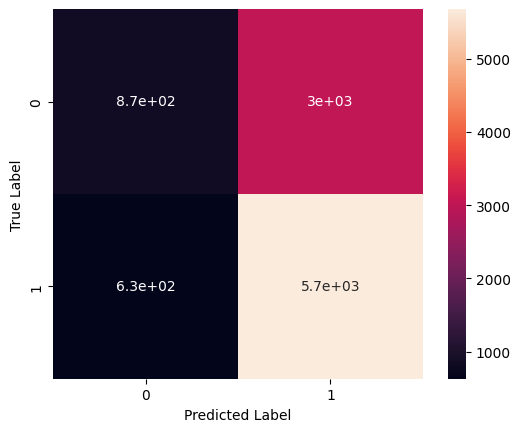

In [41]:
# Draw the heatmap for the confusion matrix
sns.heatmap(c_matrix.round(23), annot=True, square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

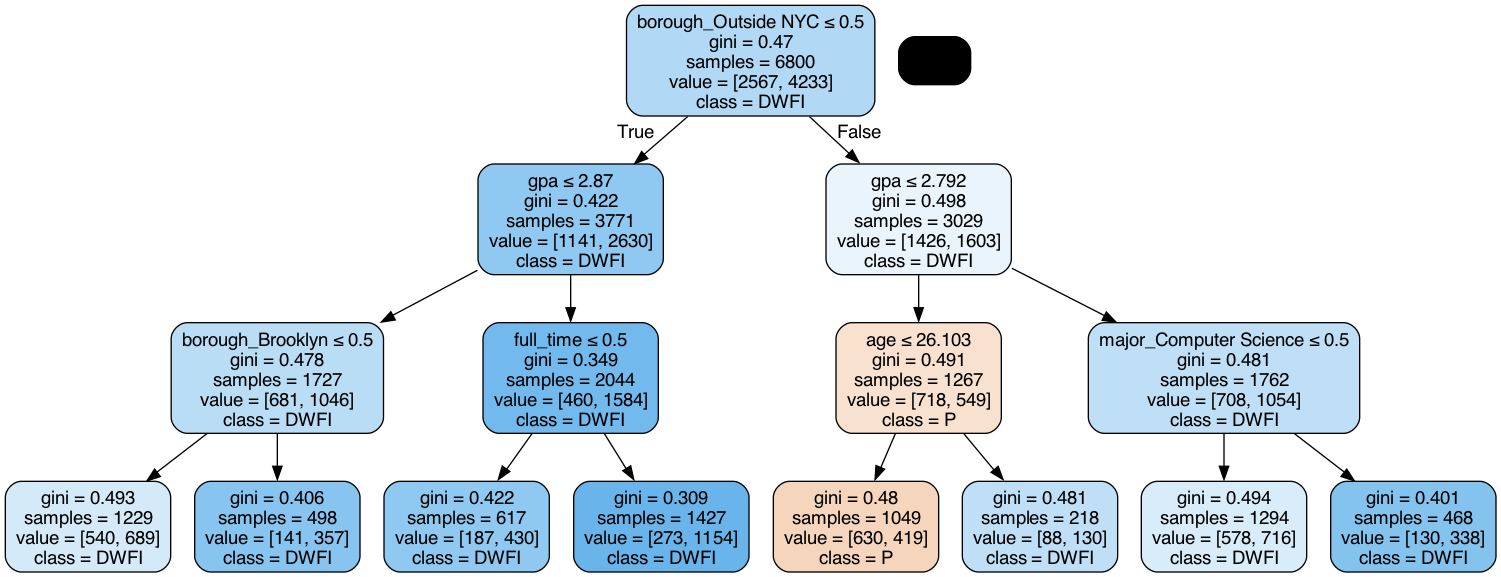

In [42]:
# graph decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['P','DWFI'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('students.png')
Image(graph.create_png())